**PACKAGES** 

In [1]:
import pandas as pd 
import os 
import tqdm
import json
# pd.options.display.max_colwidth
# pd.set_option('display.max_colwidth',None)
import re
import nltk.corpus
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iyfsi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\iyfsi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [247]:
from nltk.corpus import *
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import IndianCorpusReader
from nltk.probability import FreqDist 
from wordcloud import WordCloud

from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection  import SelectKBest, mutual_info_classif 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve 
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold 
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer 
from sklearn.preprocessing import StandardScaler


from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from spacy.lang.en.stop_words import STOP_WORDS as en_stop
from spacy.lang.hi.stop_words import STOP_WORDS as hi_stop
from spacy.lang.pt.stop_words import STOP_WORDS as pt_stop
from spacy.lang.it.stop_words import STOP_WORDS as it_stop
from spacy.lang.es.stop_words import STOP_WORDS as es_stop
from sklearn import metrics


from sklearn.pipeline import Pipeline
import itertools

import unidecode
import string
import numpy as np
from matplotlib import pyplot as plt 

from bs4 import BeautifulSoup
import json
from flatten_json import flatten

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import transformers
from transformers import BertTokenizer, BertForNextSentencePrediction
from transformers import BertTokenizer,  BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset


**PARAMETERS**

In [3]:
# Download and load the dataset locally 

p_news_collection = 'news_collection.json' 

**FUNCTIONS** : 
**LOADIND DATA, CONVERTING JSON NESTED TO FLATTEN**

In [4]:
# LOADING DATA 
def data_load_json(p_parameter): 
    wd = os.getcwd()
    filepath = os.path.join(wd,p_parameter)
    with open(filepath,'r', encoding='utf-8') as f:
        users = [json.loads(line) for line in f]
    return users

In [5]:
# CONVERT YOUR NESTED DATA FORMAT TO FLATTEN FORMAT
def nested_to_flatten(data_parameter, p_path_list, p_meta_list):
   flatten_data = pd.json_normalize(data=data_parameter,record_path=p_path_list,meta=p_meta_list)
   return flatten_data

# 1- EDA

In [6]:
# Load data 

data = data_load_json(p_news_collection)

In [7]:
# Normalize the data - From complex structure to flatten format 

data_df = pd.json_normalize(data, meta=['lang',['ref_source','text'], 'label'])

In [8]:
data_df.head(3)

,news_id,agency,claim,fact_url,label,lang,ref_source_url,statement,_id.$oid,ref_source._id.$oid,...,ref_source.meta_data.cq,ref_source.meta_data.Search.Interest,ref_source.meta_data.x-ua-compatible,ref_source.meta_data.auto-publish,ref_source.meta_data.sailthru.contenttype,ref_source.meta_data.sailthru.socialtitle,ref_source.meta_data.sailthru.excerpt,statement.$numberDouble,ref_source.meta_data.fb.app_id,ref_source.meta_data.cdc.mls_number.$numberInt
0,webMD-2102578004,webMD,Coronavirus Is a Breeding Ground for Conspirac...,https://www.snopes.com/news/2020/02/28/coronav...,real,en,https://www.snopes.com/news/2020/02/28/coronav...,Coronavirus Is a Breeding Ground for Conspirac...,5f8911702a4301b0368d10f9,5f338e26dfd2b7a505e3d5c9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,webMD-3451925886,webMD,COVID-19 and PPE: Some of Us Will Die,https://www.webmd.com/lung/news/20200320/covid...,real,en,https://www.webmd.com/lung/news/20200320/covid...,COVID19 and PPE Some of Us Will Die,5f8911702a4301b0368d10fe,5f338e28dfd2b7a505e3d5d2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,webMD-9632391802,webMD,Worldwide Number of COVID-19 Cases Over 1 Million,https://www.webmd.com/lung/news/20200403/world...,real,en,https://www.webmd.com/lung/news/20200403/world...,Worldwide Number of COVID19 Cases Over 1 Million,5f8911702a4301b0368d112a,5f338e4bdfd2b7a505e3d635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data_df.tail(3)

,news_id,agency,claim,fact_url,label,lang,ref_source_url,statement,_id.$oid,ref_source._id.$oid,...,ref_source.meta_data.cq,ref_source.meta_data.Search.Interest,ref_source.meta_data.x-ua-compatible,ref_source.meta_data.auto-publish,ref_source.meta_data.sailthru.contenttype,ref_source.meta_data.sailthru.socialtitle,ref_source.meta_data.sailthru.excerpt,statement.$numberDouble,ref_source.meta_data.fb.app_id,ref_source.meta_data.cdc.mls_number.$numberInt
16271,twitter-1227915472793935872,NaN,NaN,NaN,real,es,https://twitter.com/i/web/status/1227915472793...,🗣️ Fernando Simón en rueda de prensa: \n\nLas ...,5f8fa28836695a781536d407,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16272,twitter-1227891794408591360,NaN,NaN,NaN,real,es,https://twitter.com/i/web/status/1227891794408...,"Minutos antes de la reunión del #EPSCO, el min...",5f8fa28836695a781536d40a,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16273,twitter-1227610488667869185,NaN,NaN,NaN,real,es,https://twitter.com/i/web/status/1227610488667...,El ministro @salvadorilla se ha reunido con la...,5f8fa28836695a781536d40d,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Properties of the dataset**

In [10]:
# Number of rows and columns 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16274 entries, 0 to 16273
Columns: 928 entries, news_id to ref_source.meta_data.cdc.mls_number.$numberInt
dtypes: float64(11), object(917)
memory usage: 115.2+ MB


In [11]:
# Number of rows and columns 
data_df.shape

(16274, 928)

In [12]:
# List of columns 
data_df.columns.to_list()

['news_id',
 'agency',
 'claim',
 'fact_url',
 'label',
 'lang',
 'ref_source_url',
 'statement',
 '_id.$oid',
 'ref_source._id.$oid',
 'ref_source.id',
 'ref_source.authors',
 'ref_source.canonical_link',
 'ref_source.html',
 'ref_source.images',
 'ref_source.keywords',
 'ref_source.lang',
 'ref_source.meta_data.viewport',
 'ref_source.meta_data.description',
 'ref_source.meta_data.robots',
 'ref_source.meta_data.og.locale',
 'ref_source.meta_data.og.type',
 'ref_source.meta_data.og.title',
 'ref_source.meta_data.og.description',
 'ref_source.meta_data.og.url',
 'ref_source.meta_data.og.site_name',
 'ref_source.meta_data.og.image.identifier',
 'ref_source.meta_data.og.image.secure_url',
 'ref_source.meta_data.og.image.width.$numberInt',
 'ref_source.meta_data.og.image.height.$numberInt',
 'ref_source.meta_data.article.publisher',
 'ref_source.meta_data.fb.app_id.$numberLong',
 'ref_source.meta_data.twitter.card',
 'ref_source.meta_data.twitter.description',
 'ref_source.meta_data.twit

In [13]:
# drop unecessary columns 

data_df = data_df.loc[:,['news_id','ref_source.text','lang','label']]
data_df

,news_id,ref_source.text,lang,label
0,webMD-2102578004,This article by Daniel Jolley and Pia Lamberty...,en,real
1,webMD-3451925886,What your doctor is reading on Medscape.com:\n...,en,real
2,webMD-9632391802,"April 3, 2020 - The global number of coronavir...",en,real
3,webMD-2255331138,"March 27, 2020 - COVID-19 will likely become s...",en,real
4,webMD-3472860572,The programs help you find what you need to kn...,en,real
...,...,...,...,...
16269,twitter-1227950544825835520,La jefa del Servicio de Medicina Preventiva de...,es,real
16270,twitter-1227950131892432902,"""Por tanto –ha añadido Simón- no tenemos #coro...",es,real
16271,twitter-1227915472793935872,🗣️ Fernando Simón en rueda de prensa: \n\nLas ...,es,real
16272,twitter-1227891794408591360,"Minutos antes de la reunión del #EPSCO, el min...",es,real


In [14]:
# Renaming columns  

data_df = data_df.loc[:,['ref_source.text','lang','label']]
data_df.rename(columns={'ref_source.text':'text', 'label':'category'},inplace=True)
data_df

,text,lang,category
0,This article by Daniel Jolley and Pia Lamberty...,en,real
1,What your doctor is reading on Medscape.com:\n...,en,real
2,"April 3, 2020 - The global number of coronavir...",en,real
3,"March 27, 2020 - COVID-19 will likely become s...",en,real
4,The programs help you find what you need to kn...,en,real
...,...,...,...
16269,La jefa del Servicio de Medicina Preventiva de...,es,real
16270,"""Por tanto –ha añadido Simón- no tenemos #coro...",es,real
16271,🗣️ Fernando Simón en rueda de prensa: \n\nLas ...,es,real
16272,"Minutos antes de la reunión del #EPSCO, el min...",es,real


In [15]:
# Number of rows and columns 
data_df.shape

(16274, 3)

In [16]:
# Empty values proportion per columns 
# On the first sight you realized that

values_proportion = (((100 * data_df.isna().sum()) / len(data_df.index)).round(2)).to_frame()
values_proportion.rename(columns={0:'Proportion of missing values'}, inplace=True)
values_proportion.reset_index()

,index,Proportion of missing values
0,text,2.31
1,lang,2.40
2,category,0.00


In [17]:
# List of languages
data_df.lang.unique()

array(['en', 'es', 'fr', 'pt', 'it', 'hi', 'uk', 'de', 'mk', 'tr', 'id',
       'sv', 'el', 'hr', 'pl', 'gu', 'or', 'ml', 'th', 'ta', nan, 'ar',
       'ja', 'ru', 'lv', 'lt', 'zh', 'nl', 'ka', 'bn', 'da', 'ko', 'my',
       'fa'], dtype=object)

In [18]:
# Number of languages 
len(data_df.lang.unique())

34

In [19]:
# Empty values for text column per type of languages 
# 1941 + 2230 missing values in the text column - these missing values are based on either np.nan or NONE 
# 2230 missing values in the text column - these missing values are based on either empty text, that to say len() <= 5
# Overall 4171 missing values : 23% of the dataset  
# Overall 12103 records for all languages  then 11784 records for 6 languages mentioned in the articles  

text_df = data_df.loc[ (data_df['text'].isna()==True) | (data_df['text']=='NONE') | (data_df['text'].str.len() <= 5) , :]
#text_df
x = text_df.groupby(by=['lang']).count()
x.sort_values(by=['text'],ascending=False)

,text,category
lang,,
en,1343,1356
es,910,916
fr,608,608
ar,173,173
hi,114,147
pt,89,90
zh,59,59
ml,49,49
it,44,44


In [20]:
# Remove NA's from the dataset 

# Get names of indexes for which column text has value np.nan or NONE
IndexName = data_df.loc[ (data_df['text'].isna()==True) | (data_df['text']=='NONE') | (data_df['text'].str.len() <= 5), ['text']].index

# Delete these row indexes from dataFrame
data_df.drop(IndexName ,inplace=True)

In [21]:
# Repartion of the data per the language 
# Overall 26 languages 

data_df.lang.unique()

array(['en', 'es', 'fr', 'pt', 'it', 'hi', 'uk', 'de', 'mk', 'tr', 'sv',
       'el', 'hr', 'pl', 'id', 'or', 'ml', 'th', 'ta', 'gu', nan, 'lt',
       'ja', 'bn', 'zh', 'fa'], dtype=object)

**Keeping Only the 6 languages mentioned in the article** 

In [22]:
data_copy = data_df
data_df = data_df.loc[ (data_df['lang'].isin(['en','es','fr','pt','it','hi'])) , :]

**Proportion of language**

In [23]:
lang_df = data_df.groupby(by='lang').count()
lang_df = lang_df[['text']]
lang_df.rename(columns={'text':'proportion'},inplace=True)
lang_df

,proportion
lang,
en,6067
es,2079
fr,348
hi,1420
it,1003
pt,867


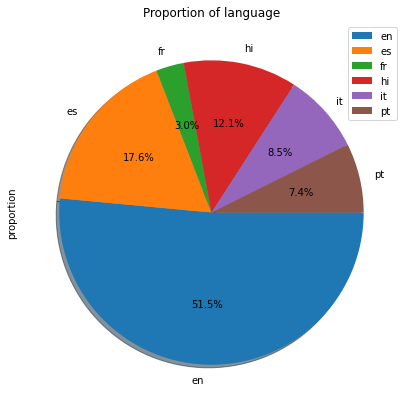

In [24]:
# Proportion of Languages 
def plot_pie_chart():
    lang_df.plot(kind='pie', y='proportion',figsize=(7,7),autopct='%1.1f%%',counterclock=False, shadow = True)
    plt.title('Proportion of language')
    plt.legend()
    plt.show()

plot_pie_chart()

**Proportion of categories** 

In [25]:
caegory_df = data_df.groupby(by='category').count()
caegory_df = caegory_df[['text']]
caegory_df.rename(columns={'text':'proportion'},inplace=True)
caegory_df

,proportion
category,
fake,2179
real,9605


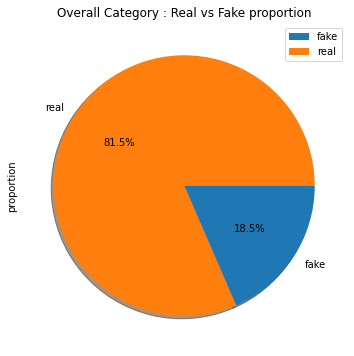

In [26]:
# Overall Category, real vs fake proportion function 
def plot_pie_chart():
    caegory_df.plot(kind='pie', y='proportion',figsize=(6,6),autopct='%1.1f%%',counterclock=False, shadow = True)
    plt.title('Overall Category : Real vs Fake proportion')
    plt.legend()
    plt.show()

plot_pie_chart()

**Words cloud** 

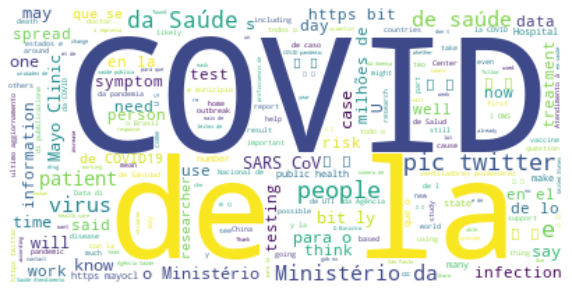

In [27]:
# Real Contents/text 
# Word cloud function 
def plot_word_cloud(p_parameters):
    text = ' '.join([element for element in data_df.loc[data_df['category']==p_parameters,'text']])
    word_cloud = WordCloud(background_color='white').generate(text)
    plt.figure(figsize=(10,10))
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

plot_word_cloud('real')

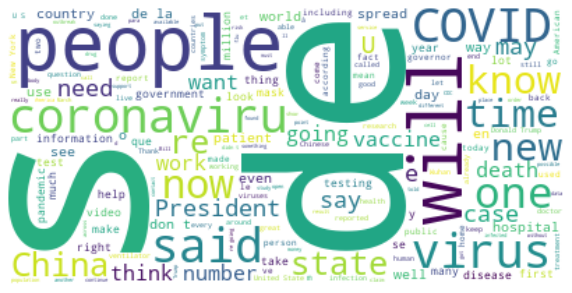

In [28]:
# fake contents/text 
plot_word_cloud('fake')

**Text processing**

In [29]:
#stopWords = set(stopwords.words('english') + stopwords.words('spanish') + stopwords.words('portuguese') 
# + stopwords.words('india') + stopwords.words('french') + stopwords.words('italian'))

stopwords_list = set(list(fr_stop) + list(en_stop) + list(hi_stop) + list(pt_stop) + list(it_stop) + list(es_stop)) 



#creating a function to encapsulate preprocessing, to make it easy to replicate on submission data
def processing(df):
    
    # Remove twittwer links 
    df['processed'] = df['text'].apply(lambda x: re.sub(r'pic.twitter.com/[\w]*','', x)) 

    #lowering/normalizing and removing punctuation
    df['processed'] = df['processed'].apply(lambda x: re.sub(r'[^\w\s]','', x.lower()))

    # removing links 
    df['processed']  = df['processed'].apply(lambda x: re.sub(r'http\S+','', x)) 

    # removing speacial characters 
    chars = re.escape(string.punctuation)
    df['processed']  = df['processed'].apply(lambda x: re.sub(r'['+chars+']','', x)) 
     

    # removing newlines,tabs and any of their combination 
    df['processed'] = df['processed'].apply(lambda x: re.sub(r'\\n|\n|\t|\\|-',' ', x))  

    # removing white spaces 
    pattern = re.compile(r'\s+')
    df['processed']  = df['processed'].apply(lambda x: re.sub(pattern,' ', x)) 

    return df

In [30]:
data_df = processing(data_df)
data_df

C:\Users\iyfsi\AppData\Local\Temp/ipykernel_3384/3765995824.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed'] = df['text'].apply(lambda x: re.sub(r'pic.twitter.com/[\w]*','', x))
C:\Users\iyfsi\AppData\Local\Temp/ipykernel_3384/3765995824.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed'] = df['processed'].apply(lambda x: re.sub(r'[^\w\s]','', x.lower()))
C:\Users\iyfsi\AppData\Local\Temp/ipykernel_3384/3765995824.py:18: SettingWithCopyWarning: 
A value is trying to be s

,text,lang,category,processed
0,This article by Daniel Jolley and Pia Lamberty...,en,real,this article by daniel jolley and pia lamberty...
1,What your doctor is reading on Medscape.com:\n...,en,real,what your doctor is reading on medscapecom mar...
2,"April 3, 2020 - The global number of coronavir...",en,real,april 3 2020 the global number of coronavirus ...
3,"March 27, 2020 - COVID-19 will likely become s...",en,real,march 27 2020 covid19 will likely become seaso...
4,The programs help you find what you need to kn...,en,real,the programs help you find what you need to kn...
...,...,...,...,...
16269,La jefa del Servicio de Medicina Preventiva de...,es,real,la jefa del servicio de medicina preventiva de...
16270,"""Por tanto –ha añadido Simón- no tenemos #coro...",es,real,por tanto ha añadido simón no tenemos coronavi...
16271,🗣️ Fernando Simón en rueda de prensa: \n\nLas ...,es,real,fernando simón en rueda de prensa las 21 pers...
16272,"Minutos antes de la reunión del #EPSCO, el min...",es,real,minutos antes de la reunión del epsco el minis...


**Text Processing - stopwords**

In [31]:
def processing_stopwords(df):
    
    df['processed'] = df['processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))
    df['processed']  = df['processed'].apply(lambda x: re.sub(r'[0-9]','', x))
    

    return df

In [32]:
data_df = processing_stopwords(data_df)
data_df

C:\Users\iyfsi\AppData\Local\Temp/ipykernel_3384/1963775202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed'] = df['processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))
C:\Users\iyfsi\AppData\Local\Temp/ipykernel_3384/1963775202.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed']  = df['processed'].apply(lambda x: re.sub(r'[0-9]','', x))


,text,lang,category,processed
0,This article by Daniel Jolley and Pia Lamberty...,en,real,article daniel jolley pia lamberty republished...
1,What your doctor is reading on Medscape.com:\n...,en,real,doctor reading medscapecom march remind amer...
2,"April 3, 2020 - The global number of coronavir...",en,real,april global number coronavirus cases topped...
3,"March 27, 2020 - COVID-19 will likely become s...",en,real,march covid likely seasonal said anthony fau...
4,The programs help you find what you need to kn...,en,real,programs help find need know virus ways corona...
...,...,...,...,...
16269,La jefa del Servicio de Medicina Preventiva de...,es,real,jefa servicio medicina preventiva hospital góm...
16270,"""Por tanto –ha añadido Simón- no tenemos #coro...",es,real,añadido simón coronavirus riesgo infectarse pe...
16271,🗣️ Fernando Simón en rueda de prensa: \n\nLas ...,es,real,fernando simón rueda prensa personas cuarente...
16272,"Minutos antes de la reunión del #EPSCO, el min...",es,real,minutos reunión epsco salvadorilla intercambia...


**Word Cloud after cleaning**

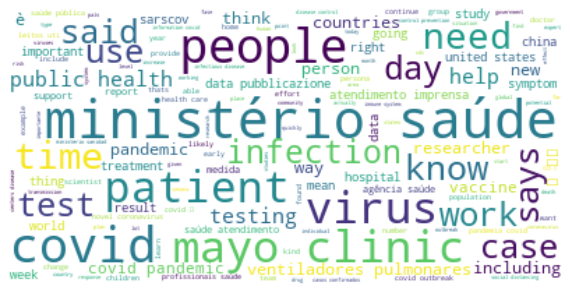

In [33]:
# real contents/text word cloud - after cleaning  
# Real Contents/text 
# Word cloud function 
def plot_word_cloud(p_parameters):
    text = ' '.join([element for element in data_df.loc[data_df['category']==p_parameters,'processed']])
    word_cloud = WordCloud(background_color='white').generate(text)
    plt.figure(figsize=(10,10))
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

plot_word_cloud('real')

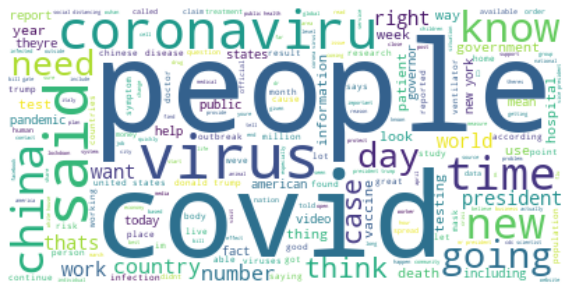

In [34]:
# fake contents/text word cloud - after cleaning 
plot_word_cloud('fake') 

**Frequency distribution**

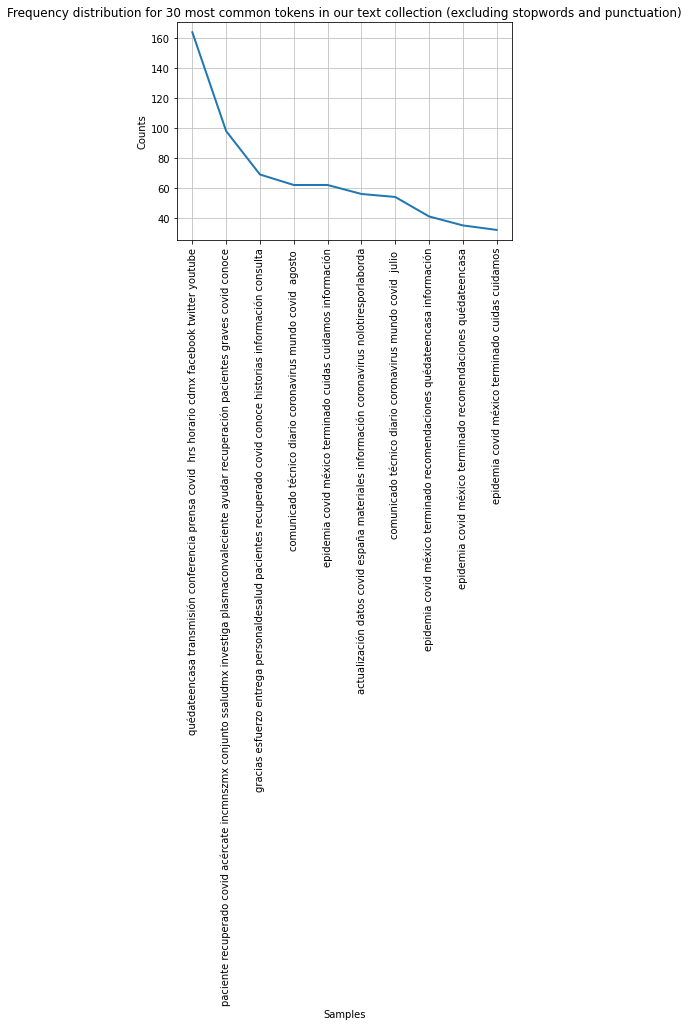

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [35]:
fdist_filtered = FreqDist(list(data_df['processed']))
fdist_filtered.plot(10,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

**Encoding**

In [36]:
# Encode Categorical Columns

def processing_encoding(df):
    
    df['categorie'] = le.fit_transform(df['category'])
    df['language'] = le.fit_transform(df['lang'])
    return df

In [37]:
data_df = processing_encoding(data_df)
data_df

C:\Users\iyfsi\AppData\Local\Temp/ipykernel_3384/770814799.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['categorie'] = le.fit_transform(df['category'])
C:\Users\iyfsi\AppData\Local\Temp/ipykernel_3384/770814799.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = le.fit_transform(df['lang'])


,text,lang,category,processed,categorie,language
0,This article by Daniel Jolley and Pia Lamberty...,en,real,article daniel jolley pia lamberty republished...,1,0
1,What your doctor is reading on Medscape.com:\n...,en,real,doctor reading medscapecom march remind amer...,1,0
2,"April 3, 2020 - The global number of coronavir...",en,real,april global number coronavirus cases topped...,1,0
3,"March 27, 2020 - COVID-19 will likely become s...",en,real,march covid likely seasonal said anthony fau...,1,0
4,The programs help you find what you need to kn...,en,real,programs help find need know virus ways corona...,1,0
...,...,...,...,...,...,...
16269,La jefa del Servicio de Medicina Preventiva de...,es,real,jefa servicio medicina preventiva hospital góm...,1,1
16270,"""Por tanto –ha añadido Simón- no tenemos #coro...",es,real,añadido simón coronavirus riesgo infectarse pe...,1,1
16271,🗣️ Fernando Simón en rueda de prensa: \n\nLas ...,es,real,fernando simón rueda prensa personas cuarente...,1,1
16272,"Minutos antes de la reunión del #EPSCO, el min...",es,real,minutos reunión epsco salvadorilla intercambia...,1,1


# **Algorithms**

In [117]:
data_x = data_df.loc[:,['processed','lang','category']]

In [118]:
data_x

,processed,lang,category
0,article daniel jolley pia lamberty republished...,en,real
1,doctor reading medscapecom march remind amer...,en,real
2,april global number coronavirus cases topped...,en,real
3,march covid likely seasonal said anthony fau...,en,real
4,programs help find need know virus ways corona...,en,real
...,...,...,...
16269,jefa servicio medicina preventiva hospital góm...,es,real
16270,añadido simón coronavirus riesgo infectarse pe...,es,real
16271,fernando simón rueda prensa personas cuarente...,es,real
16272,minutos reunión epsco salvadorilla intercambia...,es,real


In [119]:
data_x.reset_index(inplace=True)

In [120]:
data_x = data_x.loc[:,['processed','category']]

In [121]:
data_x

,processed,category
0,article daniel jolley pia lamberty republished...,real
1,doctor reading medscapecom march remind amer...,real
2,april global number coronavirus cases topped...,real
3,march covid likely seasonal said anthony fau...,real
4,programs help find need know virus ways corona...,real
...,...,...
11779,jefa servicio medicina preventiva hospital góm...,real
11780,añadido simón coronavirus riesgo infectarse pe...,real
11781,fernando simón rueda prensa personas cuarente...,real
11782,minutos reunión epsco salvadorilla intercambia...,real


In [122]:
cleanup_nums = {"category":     {"real": 1, "fake": 2},
                "lang": {"en": 0, "es": 1, "fr": 2, "pt": 3,
                                  "it": 4, "hi": 5 }}

data_x = data_x.replace(cleanup_nums)
data_x.head()

,processed,category
0,article daniel jolley pia lamberty republished...,1
1,doctor reading medscapecom march remind amer...,1
2,april global number coronavirus cases topped...,1
3,march covid likely seasonal said anthony fau...,1
4,programs help find need know virus ways corona...,1


In [127]:
corpus = []
for i in range(0, len(data_x)):
    review = data_x['processed'][i]
    review = review.lower()
    review = review.split()
    
    review = [word for word in review]
    review = ' '.join(review)
    corpus.append(review)

In [133]:
# Build the corpus
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()


In [136]:
y=data_x.iloc[:,-1]

**Train_test_split**

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [141]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7895, 5000)
(3889, 5000)
(7895,)
(3889,)


**Hyperparameter Tuning and LogisticRegression**

In [171]:
parameters = {
    'solver':['liblinear','newton-cg', 'lbfgs'],
      'n_jobs': [None, -1]
}
#LogisticRegression().get_params().keys()

In [172]:
clf = GridSearchCV(LogisticRegression(),param_grid=parameters, cv=5 , return_train_score=True)

# Fit and tune model
clf.fit(X_train, y_train )

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'n_jobs': [None, -1],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs']},
             return_train_score=True)

In [173]:
for i in range(6):
    print('parameters :', clf.cv_results_['params'][i] )
    print('Mean Test Score :', clf.cv_results_['mean_test_score'][i])
    print('Rank :', clf.cv_results_['rank_test_score'][i])
    

parameters : {'n_jobs': None, 'solver': 'liblinear'}
Mean Test Score : 0.8891703609879672
Rank : 1
parameters : {'n_jobs': None, 'solver': 'newton-cg'}
Mean Test Score : 0.8889170360987968
Rank : 3
parameters : {'n_jobs': None, 'solver': 'lbfgs'}
Mean Test Score : 0.8889170360987968
Rank : 3
parameters : {'n_jobs': -1, 'solver': 'liblinear'}
Mean Test Score : 0.8891703609879672
Rank : 1
parameters : {'n_jobs': -1, 'solver': 'newton-cg'}
Mean Test Score : 0.8889170360987968
Rank : 3
parameters : {'n_jobs': -1, 'solver': 'lbfgs'}
Mean Test Score : 0.8889170360987968
Rank : 3


**Following**

In [174]:
# which settings won
clf.best_params_

{'n_jobs': None, 'solver': 'liblinear'}

**Logistic Regression - Build and Test**

In [175]:

Lr = LogisticRegression(solver='liblinear', n_jobs=None)
Lr.fit(X_train,y_train)
lr_predicted = Lr.predict(X_test)
np.mean(lr_predicted==y_test)


0.9076883517613783

In [176]:
print(classification_report(y_test, lr_predicted))

              precision    recall  f1-score   support

           1       0.90      0.99      0.95      3175
           2       0.94      0.53      0.68       714

    accuracy                           0.91      3889
   macro avg       0.92      0.76      0.81      3889
weighted avg       0.91      0.91      0.90      3889



**Probs Prediction**

In [203]:
probs = Lr.predict_proba(X_test)
print(probs)

[[0.93235544 0.06764456]
 [0.95625614 0.04374386]
 [0.66573606 0.33426394]
 ...
 [0.97229271 0.02770729]
 [0.35063263 0.64936737]
 [0.97557427 0.02442573]]


**Confusion Matrix**

In [196]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


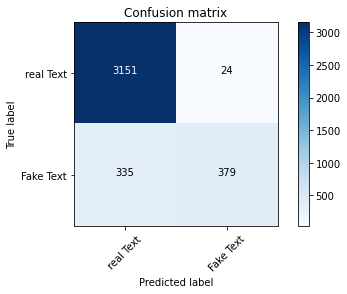

In [197]:
conf_matrix = metrics.confusion_matrix(y_test, lr_predicted) 
plot_confusion_matrix(conf_matrix,classes=['real Text','Fake Text'])

# 4- DEEP LEARNING 

**Fine-tuning a model on a text classification task**

In [210]:
# Parameters 
GLUE_TASKS = ["cola", "mnli", "mnli-mm", "mrpc", "qnli", "qqp", "rte", "sst2", "stsb", "wnli"]

**adjust the batch size to avoid out-of-memory errors**

In [211]:
task = "cola"
model_checkpoint = "distilbert-base-uncased"
batch_size = 16

**Initializing a model**

In [243]:
BERT_MODEL = "bert-base-multilingual-uncased"

tokenizer = BertTokenizer.from_pretrained(BERT_MODEL)

https://huggingface.co/bert-base-multilingual-uncased/resolve/main/vocab.txt not found in cache or force_download set to True, downloading to C:\Users\iyfsi\.cache\huggingface\transformers\tmpt7zgbrmu
Downloading: 100%|██████████| 851k/851k [00:00<00:00, 988kB/s] 
storing https://huggingface.co/bert-base-multilingual-uncased/resolve/main/vocab.txt in cache at C:\Users\iyfsi/.cache\huggingface\transformers\269f2943d168a4cd2ddf3864cee89d7f7d78873b3d14a1229174d37212981a38.92022aa29ab6663b0b4254744f28ab43e6adf4deebe0f26651e6c61f28f69d8b
creating metadata file for C:\Users\iyfsi/.cache\huggingface\transformers\269f2943d168a4cd2ddf3864cee89d7f7d78873b3d14a1229174d37212981a38.92022aa29ab6663b0b4254744f28ab43e6adf4deebe0f26651e6c61f28f69d8b
https://huggingface.co/bert-base-multilingual-uncased/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to C:\Users\iyfsi\.cache\huggingface\transformers\tmp48sxe6m3
Downloading: 100%|██████████| 28.0/28.0 [00:

In [252]:
# Converting to PyTorch Data Types
# Our model expects PyTorch tensors rather than numpy.ndarrays, so convert all of our dataset variables.

# Convert all inputs and labels into torch tensors, the required datatype 
# for our model.
train_inputs = torch.tensor(X_train)
validation_inputs = torch.tensor(y_train)

train_labels = torch.tensor(np.array(X_test))
validation_labels = torch.tensor(y_test)

#train_masks = torch.tensor(train_masks)
#validation_masks = torch.tensor(validation_masks)

ValueError: could not determine the shape of object type 'Series'